In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [5]:
(df.isnull().sum().sum())/len(df) * 100

191.19565217391303

In [6]:
df.dropna(subset=['fbs', 'exang'], inplace=True)

df = df[df['chol'] != 0]
df = df[df['chol'] <= 500]



In [7]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,662.000000,662.000000,661.000000,662.000000,662.000000,659.000000,301.000000,662.000000
mean,373.583082,52.655589,132.804841,244.409366,141.268882,0.911836,0.667774,0.818731
std,253.714496,9.412988,17.830083,52.482488,25.072908,1.105202,0.935908,1.087856
min,1.000000,28.000000,92.000000,85.000000,69.000000,0.000000,0.000000,0.000000
25%,167.250000,46.000000,120.000000,209.250000,122.250000,0.000000,0.000000,0.000000
50%,335.000000,54.000000,130.000000,239.000000,143.000000,0.500000,0.000000,0.000000
75%,524.750000,59.000000,140.000000,275.000000,160.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,491.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
for col in df[['restecg', 'slope', 'thal']]:
    df[col].fillna(value='unknown', inplace= True)

In [9]:
for col in df[['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']]:
    df[col].fillna(value= df[col].mean(), inplace= True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        662 non-null    int64  
 1   age       662 non-null    int64  
 2   sex       662 non-null    object 
 3   dataset   662 non-null    object 
 4   cp        662 non-null    object 
 5   trestbps  662 non-null    float64
 6   chol      662 non-null    float64
 7   fbs       662 non-null    object 
 8   restecg   662 non-null    object 
 9   thalch    662 non-null    float64
 10  exang     662 non-null    object 
 11  oldpeak   662 non-null    float64
 12  slope     662 non-null    object 
 13  ca        662 non-null    float64
 14  thal      662 non-null    object 
 15  num       662 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 87.9+ KB


In [12]:
df.describe(exclude= ['int', 'float'])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,662,662,662,662,662,662,662,662
unique,2,3,4,2,4,2,4,4
top,Male,Cleveland,asymptomatic,False,normal,False,flat,unknown
freq,492,303,333,562,397,412,257,314


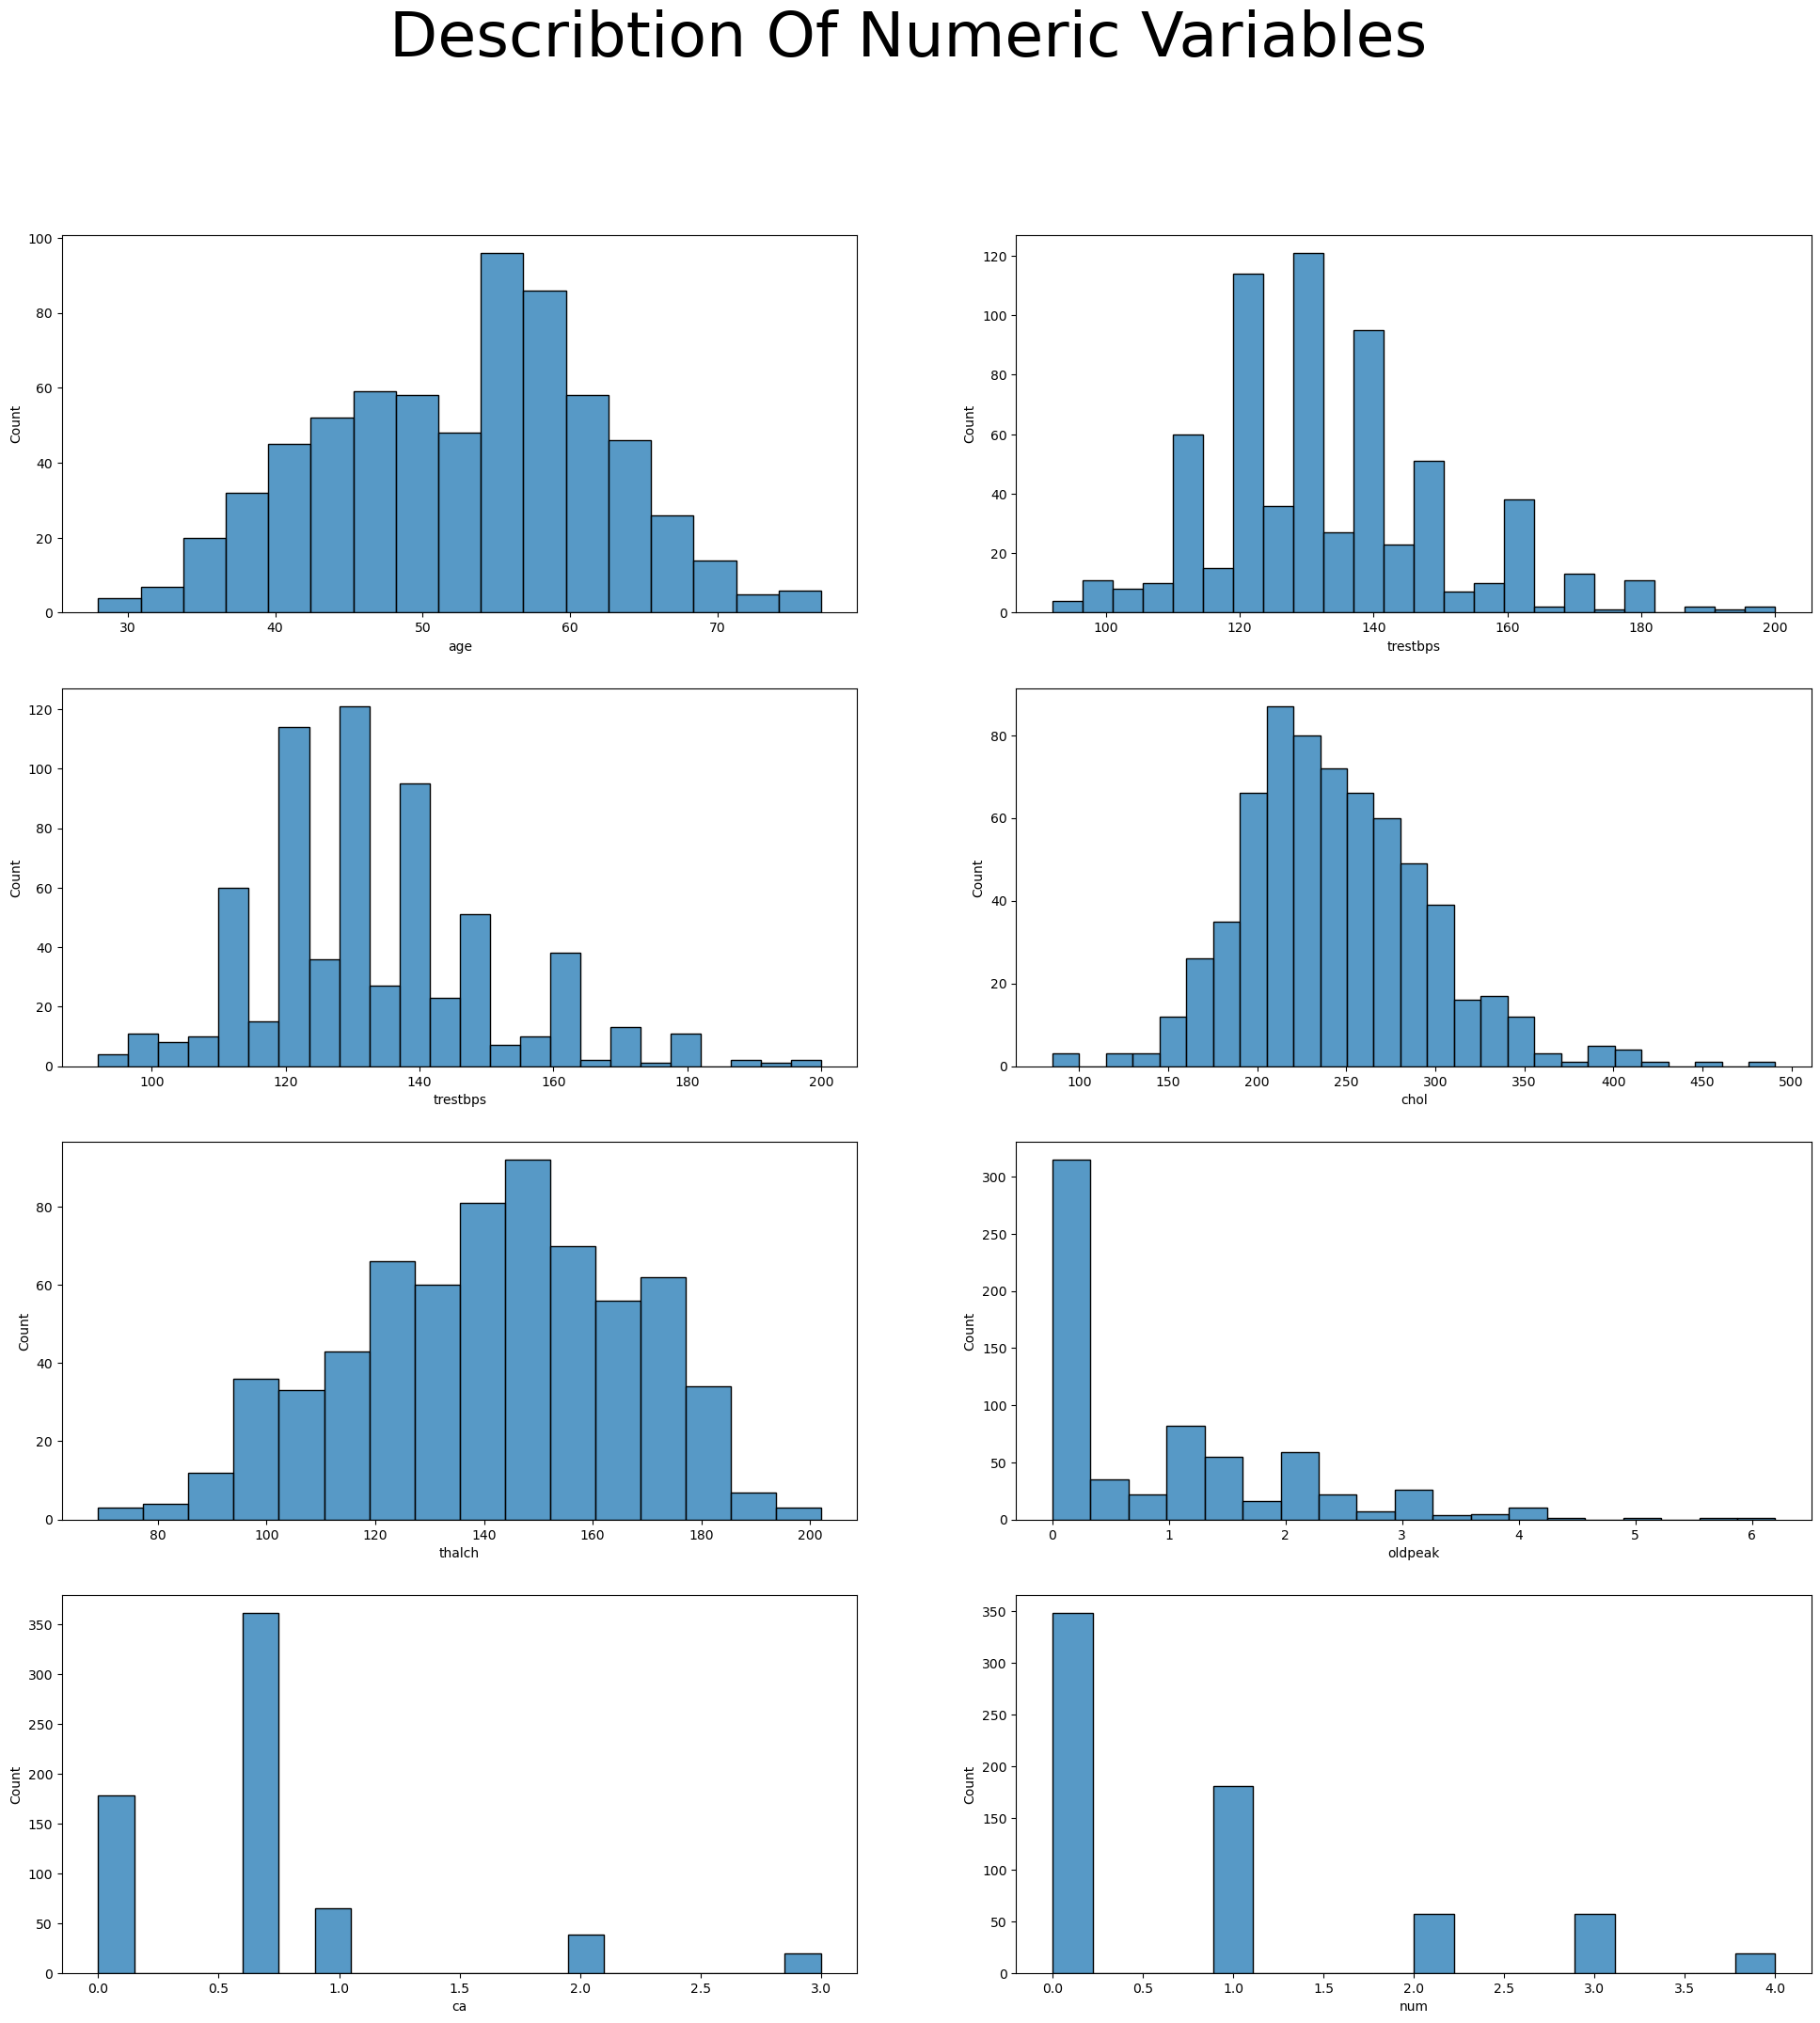

In [13]:
numeric_columns = ['age', 'trestbps', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

fig, axes = plt.subplots(4, 2, figsize=(24,24))
fig.suptitle('Describtion Of Numeric Variables', size = 48)

for i in range(4):
    for n in range(2):
        sns.histplot(df[numeric_columns[2*i+n]], ax=axes[i,n])
        




In [14]:
df.num.value_counts()

num
0    348
1    181
2     57
3     57
4     19
Name: count, dtype: int64

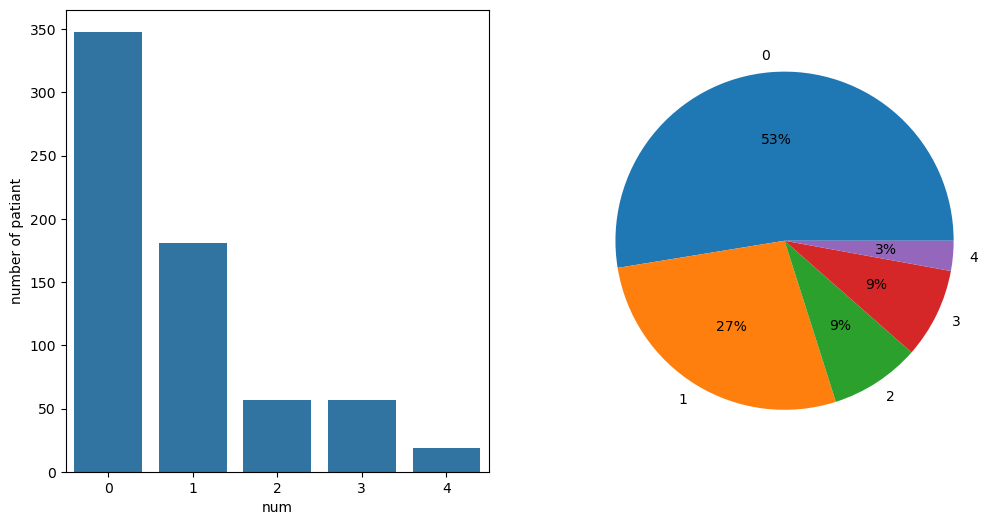

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
plt.pie(df.num.value_counts(), labels = ['0', '1', '2', '3', '4'], autopct = '%.0f%%')
cp = sns.countplot(x= df['num'], ax= ax[0],  )
cp.set_xlabel('num')
cp.set_ylabel('number of patiant')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

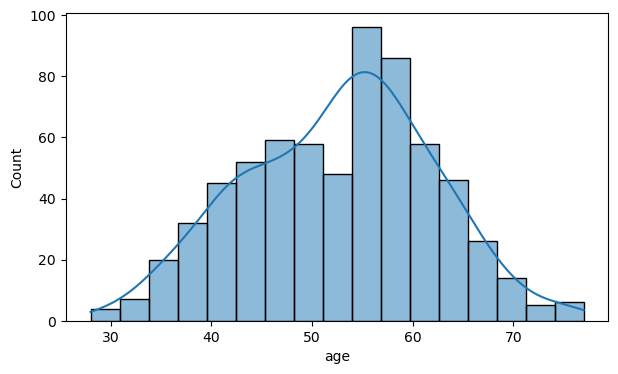

In [16]:
plt.figure(figsize=(7,4))
sns.histplot(df['age'],kde=True)

In [17]:
df.groupby('sex')['age'].value_counts()


sex     age
Female  54     14
        51     10
        62      8
        43      8
        58      7
               ..
Male    33      1
        72      1
        71      1
        28      1
        31      1
Name: count, Length: 88, dtype: int64

<Axes: xlabel='age', ylabel='count'>

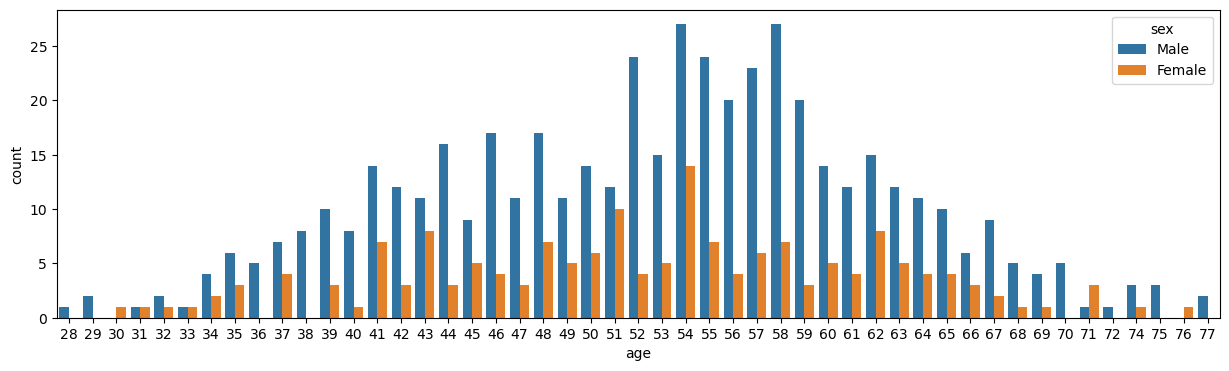

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(df, x='age', hue='sex')

<Axes: xlabel='sex', ylabel='count'>

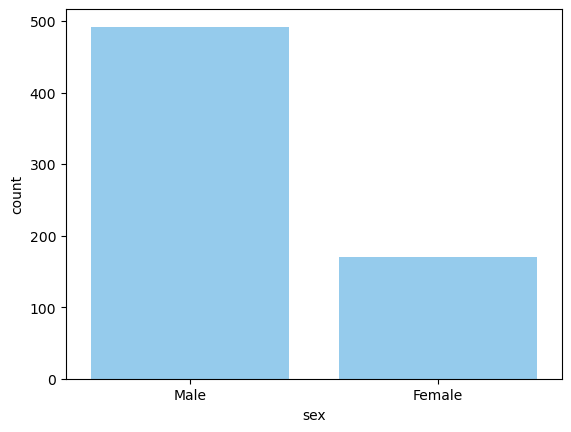

In [19]:
sns.countplot(data=df,x='sex',color='#87CEFA')

In [20]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [21]:
value_counts = df['num'].value_counts()
value_counts

num
0    348
1    181
2     57
3     57
4     19
Name: count, dtype: int64

In [22]:
from imblearn.over_sampling import RandomOverSampler

input_columns = df.drop('num', axis=1)  

class_column = df['num']

oversampler = RandomOverSampler(random_state=0)

input_columns_resampled, class_column_resampled = oversampler.fit_resample(input_columns, class_column)

df = pd.concat([input_columns_resampled, class_column_resampled], axis=1)

In [23]:
class_distribution = df['num'].value_counts()
class_distribution

num
0    348
2    348
1    348
3    348
4    348
Name: count, dtype: int64

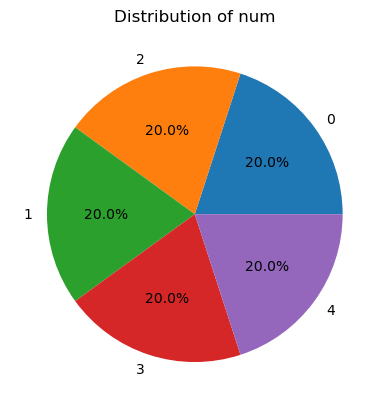

In [24]:
value_counts = df['num'].value_counts()

labels = value_counts.index

counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of num')

plt.show()

In [25]:
x = df.iloc[:, 1:15].values
print(x)

[[63 'Male' 'Cleveland' ... 'downsloping' 0.0 'fixed defect']
 [67 'Male' 'Cleveland' ... 'flat' 3.0 'normal']
 [67 'Male' 'Cleveland' ... 'flat' 2.0 'reversable defect']
 ...
 [61 'Male' 'Cleveland' ... 'flat' 1.0 'normal']
 [65 'Male' 'VA Long Beach' ... 'downsloping' 0.6677740863787376
  'unknown']
 [62 'Male' 'VA Long Beach' ... 'flat' 0.6677740863787376 'unknown']]


In [26]:
y = df.iloc[:, 15].values
print(y)

[0 2 1 ... 4 4 4]


In [27]:
from sklearn.preprocessing import LabelEncoder

labelencoder_sex = LabelEncoder()
x[:, 1] = labelencoder_sex.fit_transform(x[:, 1])

labelencoder_fbs = LabelEncoder()
x[:, 6] = labelencoder_fbs.fit_transform(x[:, 6])

labelencoder_exang = LabelEncoder()
x[:, 9] = labelencoder_exang.fit_transform(x[:, 9])

In [28]:
print(x[:, 1])
print(x[:, 6])

[1 1 1 ... 1 1 1]
[1 0 0 ... 0 0 1]


In [29]:
from joblib import dump

data = ["True", "False"]

labelencoder_exang = LabelEncoder()
labelencoder_exang.fit(data)
print(labelencoder_exang.classes_)

dump(labelencoder_exang, "exang_label_encoder.pkl")

['False' 'True']


['exang_label_encoder.pkl']

In [30]:

data = ["True", "False"]

labelencoder_fbs = LabelEncoder()
labelencoder_fbs.fit(data)
print(labelencoder_fbs.classes_)

dump(labelencoder_fbs, "fbs_label_encoder.pkl")

['False' 'True']


['fbs_label_encoder.pkl']

In [31]:
print(labelencoder_fbs.classes_)  # عرض القيم التي تم تدريب LabelEncoder عليها


['False' 'True']


In [32]:

distinct_values = np.unique(x[:, 2])
print(distinct_values)

['Cleveland' 'Hungary' 'VA Long Beach']


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(categories='auto'), [2, 3, 7, 11, -1])],
    remainder='passthrough')

x= ct.fit_transform(x)

x

array([[1.0, 0.0, 0.0, ..., 0, 2.3, 0.0],
       [1.0, 0.0, 0.0, ..., 1, 1.5, 3.0],
       [1.0, 0.0, 0.0, ..., 1, 2.6, 2.0],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 3.6, 1.0],
       [0.0, 0.0, 1.0, ..., 1, 4.0, 0.6677740863787376],
       [0.0, 0.0, 1.0, ..., 1, 3.0, 0.6677740863787376]], dtype=object)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [37]:
    def map_health_status(num_value):
        if num_value == 0:
            return "Condition improves"
        elif num_value == 1:
            return "stability"
        elif num_value == 2:
            return "Mild deterioration"
        elif num_value == 3:
            return "Moderate deterioration"
        elif num_value == 4:
            return "Serious deterioration"
        else:
            return "unknown"

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred_numeric = model.predict(X_test)
y_pred_text = [map_health_status(value) for value in y_pred_numeric]

accuracy = accuracy_score(y_test, y_pred_numeric)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 91.38%


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_numeric, average='macro')  # يمكنك تجربة 'micro' أو 'weighted' أيضًا
recall = recall_score(y_test, y_pred_numeric, average='macro')
f1 = f1_score(y_test, y_pred_numeric, average='macro')

print('Precision: {:.2f}%'.format(100 * precision))
print('Recall: {:.2f}%'.format(100 * recall))
print('F1 Score: {:.2f}%'.format(100 * f1))


Precision: 91.54%
Recall: 91.84%
F1 Score: 91.63%


<Axes: >

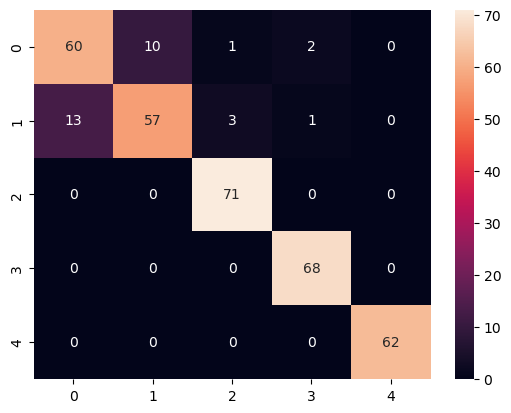

In [40]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_numeric)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [41]:
from sklearn.ensemble import RandomForestClassifier

class Model:
    def __init__(self):
        self.model = RandomForestClassifier()

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_input):
        predicted_num = self.model.predict(X_input)
        return [self.map_health_status(value) for value in predicted_num]

    def map_health_status(self, num_value):
        if num_value == 0:
            return "Condition improves"
        elif num_value == 1:
            return "stability"
        elif num_value == 2:
            return "Mild deterioration"
        elif num_value == 3:
            return "Moderate deterioration"
        elif num_value == 4:
            return "Serious deterioration"
        else:
            return "unknown"

model = Model()
model.train(X_train, y_train)


In [42]:
import pickle

filename = 'classification_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


In [43]:
import pickle

filename = 'classification_model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)


In [44]:
from joblib import dump

dump(labelencoder_sex, "sex_label_encoder.pkl")
dump(labelencoder_fbs, "fbs_label_encoder.pkl")
dump(labelencoder_exang, "exang_label_encoder.pkl")

['exang_label_encoder.pkl']

In [45]:
from joblib import dump

dump(ct, "ct_column_transformer.pkl")

['ct_column_transformer.pkl']

In [46]:
from joblib import dump

dump(scaler, "standard_scaler.pkl")

['standard_scaler.pkl']

In [47]:
new_patient = np.array( [[56, 'Female', 'Cleveland', 'typical angina', 130, 236, 'True' , 'normal', 150, 'False', 1.4, 'flat',  2, 'fixed defect']])

In [48]:
from joblib import load

labelencoder_sex_loaded=load("sex_label_encoder.pkl")
labelencoder_fbs_loaded=load("fbs_label_encoder.pkl")
labelencoder_exang_loaded=load("exang_label_encoder.pkl")



new_patient[:, 1] = labelencoder_sex_loaded.transform(new_patient[:, 1])
new_patient[:, 6] = labelencoder_fbs_loaded.transform(new_patient[:, 6])
new_patient[:, 9] = labelencoder_exang_loaded.transform(new_patient[:, 9])

In [49]:
from joblib import load

ct_loaded = load("ct_column_transformer.pkl")

new_patient = ct.transform(new_patient)

In [50]:
from joblib import load

sc_loaded = load("standard_scaler.pkl")

new_patient = sc_loaded.transform(new_patient)
print(new_patient)

[[ 0.93397532 -0.50358942 -0.59829797 -1.59266612 -0.33968311 -0.39223227
   4.55521679 -0.70223572  1.05111308 -0.48558774 -0.06201737 -0.39093075
   0.96757521 -0.49040218 -0.43169855  3.45265001 -0.43044872 -0.74651138
  -0.83091185 -0.06190933 -2.18502547 -0.35496599 -0.21882327  1.95333002
   0.66179113 -1.12151035 -0.08115787  1.25060704]]


In [51]:
from joblib import load

model = load('classification_model.pkl')


In [52]:
import pickle

with open('classification_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [111]:
pred_class = model.predict(new_patient)
print('Predicted class:', pred_class[0])


Predicted class: Condition improves
